In [22]:
## Misc functions for data editing
# For HEA dataset
import os
import numpy as np
import pandas as pd
import pymatgen as mg
from pymatgen.core.composition import Composition
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Tick parameters
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15


datafile_path = '/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/Space@Hopkins_HEA/dataset/'
df = pd.read_csv(datafile_path+'MPEA_dataset.csv')

def get_composition_df(formula):
    comp = Composition(formula)
    weights = [round(comp.get_atomic_fraction(ele), 3) for ele in comp.elements]
    elements = [str(x) for x in comp.elements]
    df = pd.DataFrame([weights], columns=elements)
    return df

comp_df = pd.concat([get_composition_df(x) for x in df['FORMULA']])
comp_df = comp_df.reindex(sorted(comp_df.columns), axis=1).fillna(0)

xls = pd.ExcelFile(datafile_path+'metal_property.xlsx')
df_descriptors = pd.read_excel(xls, 'Sheet1')
elemental_properties_dict = {}
elements_list = df_descriptors[df_descriptors.columns[0]]
row_number = 0
for element in elements_list:
    elemental_properties_dict[element] = [df_descriptors[i][row_number] for i in df_descriptors.columns[1:]]
    row_number += 1

comp_df[df_descriptors.columns[1:]] = 0.0
desc_num = 0
for descriptor in df_descriptors.columns[1:]:
    for element_name in elements_list:
        comp_df[descriptor] += comp_df[element_name]*elemental_properties_dict[element_name][desc_num]
    desc_num += 1

comp_df.index = df.index
comp_df['Processing'] = df['PROPERTY: Processing method']
comp_df['Target'] = df['PROPERTY: HV']

unique_alloys = comp_df.drop_duplicates(subset=df_descriptors.columns[1:])
unique_alloys.to_csv(datafile_path+'curated_MPEA_all629.csv',index=False)

# Shortlisted points having a hardness value
unique_alloys['Target'].replace('', np.nan)
unique_alloys_initial_training = unique_alloys.dropna(subset=['Target'])



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
unique_alloys_topperformers_training = unique_alloys_initial_training[unique_alloys_initial_training['Target'] > 850]


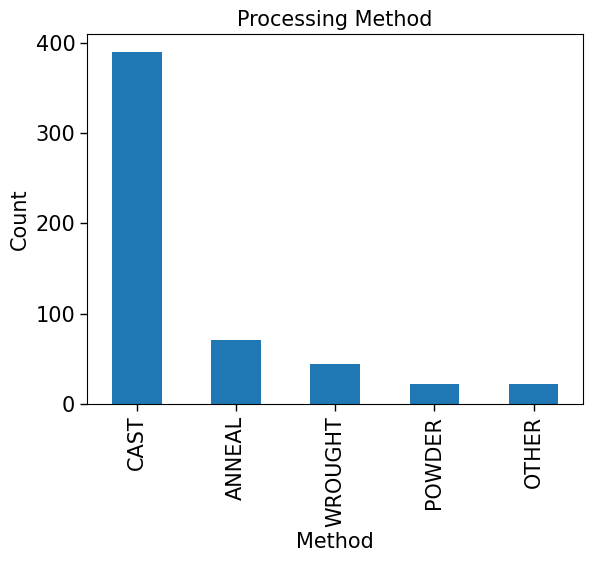

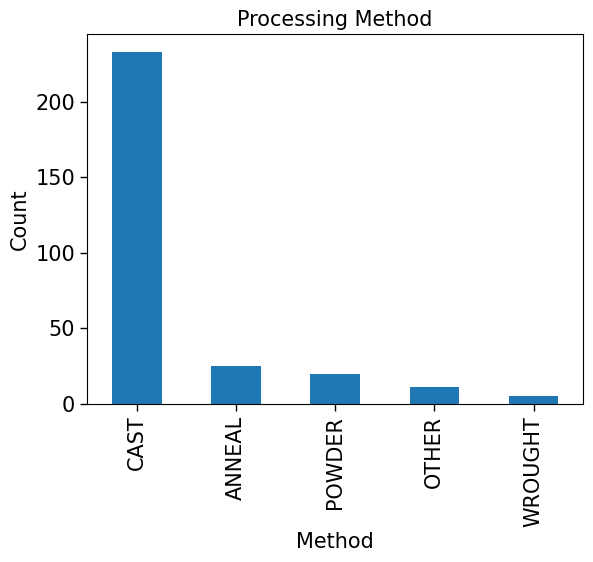

In [28]:
# Get the value counts of the 'Processing' column for all alloys
category_counts = unique_alloys['Processing'].value_counts()

# Plot the bar chart
category_counts.plot.bar(title='Processing Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

# Get the value counts of the 'Processing' column for alloys with hardness values measured
category_counts = unique_alloys_initial_training['Processing'].value_counts()

# Plot the bar chart
category_counts.plot.bar(title='Processing Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

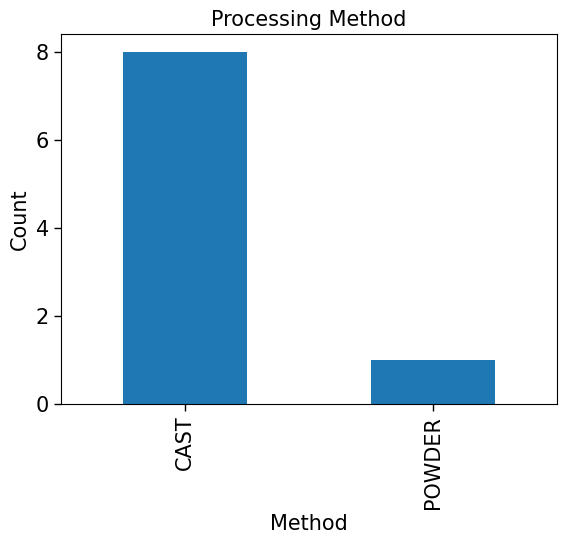

In [29]:
# Get the value counts of the 'Processing' column for alloys with high hardness values 
category_counts = unique_alloys_topperformers_training['Processing'].value_counts()

# Plot the bar chart
category_counts.plot.bar(title='Processing Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()